# Predictive model for Iris dataset using Logistic Regression, SVM, Naive Bayes, Decision Tree, Random Forest, KNN  Algorithms

In [1]:
# Importing neccesary libraries for data visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [2]:
# Importing neccesary libraries to train prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

In [3]:
# Importing Iris dataset
df = pd.read_csv('F:/ML/Kaggle/Iris/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking for missing values and the distribution of variables
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

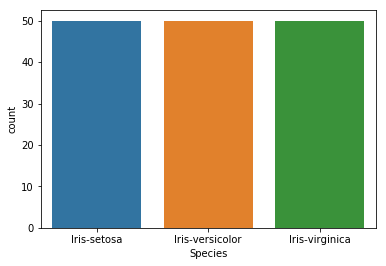

In [7]:
# Bar graph 
sns.countplot('Species',data=df)

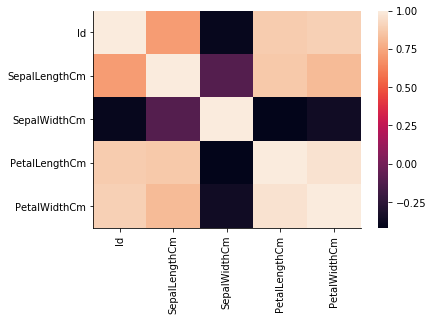

In [8]:
# correlation between the features
sns.heatmap(df.corr())
sns.despine()

In [9]:
# Calculating the correlation between variables
corr = df.iloc[:,1:5].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


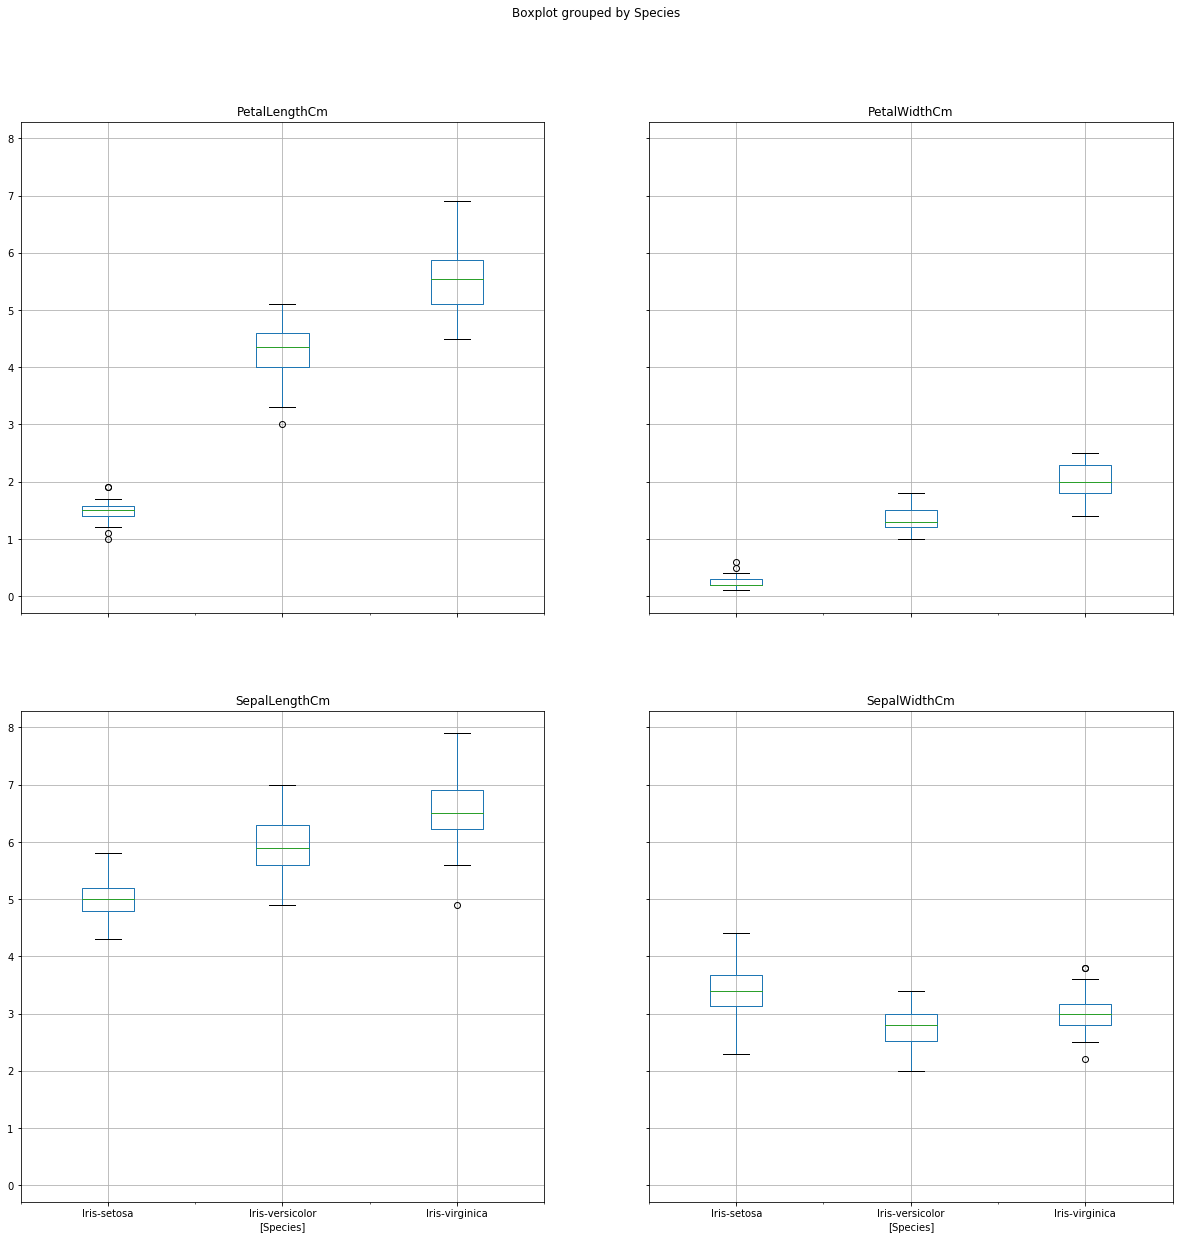

In [10]:
# Visualizing using boxplot
df.drop("Id",axis = 1).boxplot(by="Species", figsize=(20, 20))
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


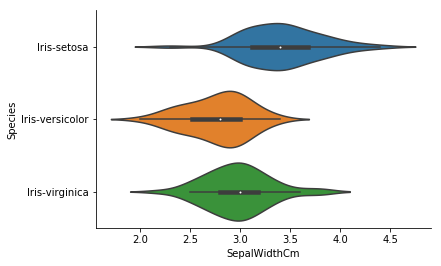

In [11]:
#distribution based on sepal width
sns.violinplot(df['SepalWidthCm'],df['Species'])
sns.despine()


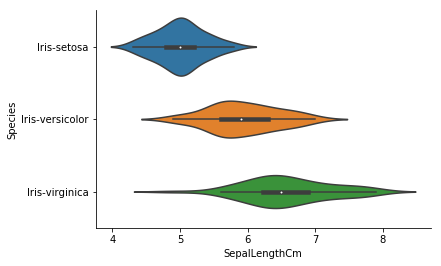

In [12]:
# Distribution based on sepal length
sns.violinplot(df['SepalLengthCm'],df['Species'])
sns.despine()

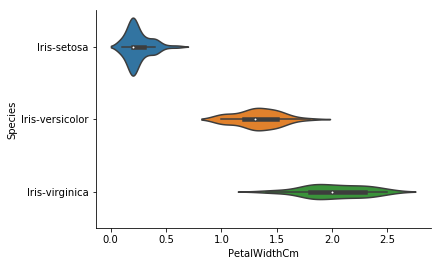

In [13]:
# distribution based on petal width
sns.violinplot(df['PetalWidthCm'],df['Species'])
sns.despine()

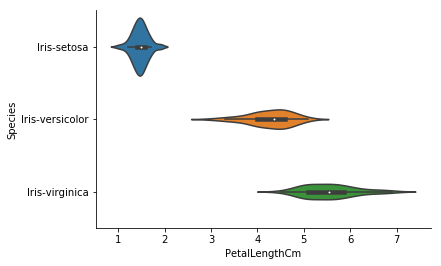

In [14]:
# distribution based on petal length
sns.violinplot(df['PetalLengthCm'],df['Species'])
sns.despine()

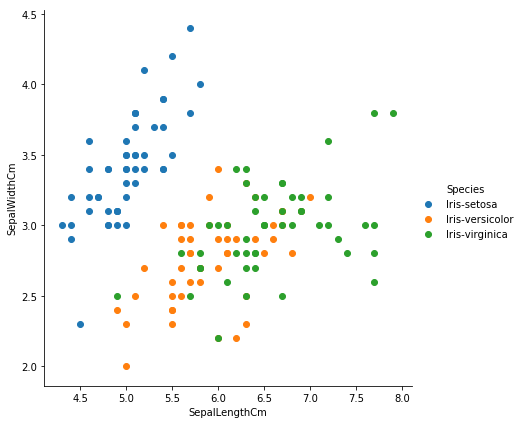

In [15]:
# Visualizing based on sepal length and width
sns.FacetGrid(df,hue='Species',height = 6 )\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

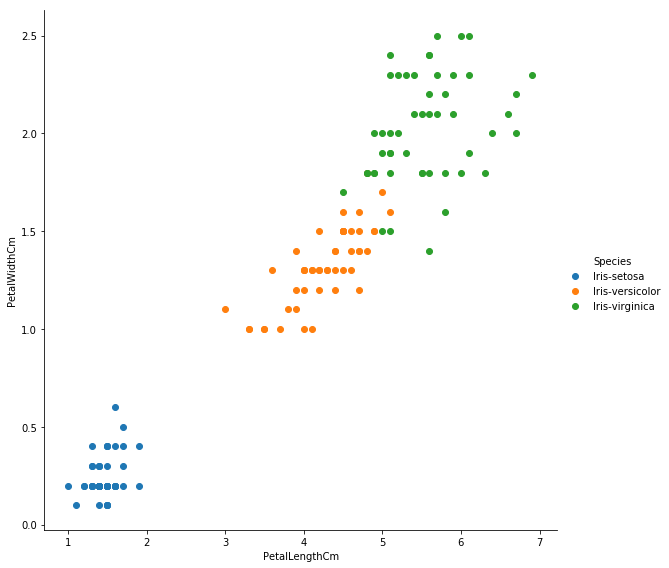

In [16]:
# Visualizing based on petal length and width
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(df,hue='Species',height = 8)\
.map(plt.scatter,'PetalLengthCm','PetalWidthCm')\
.add_legend()

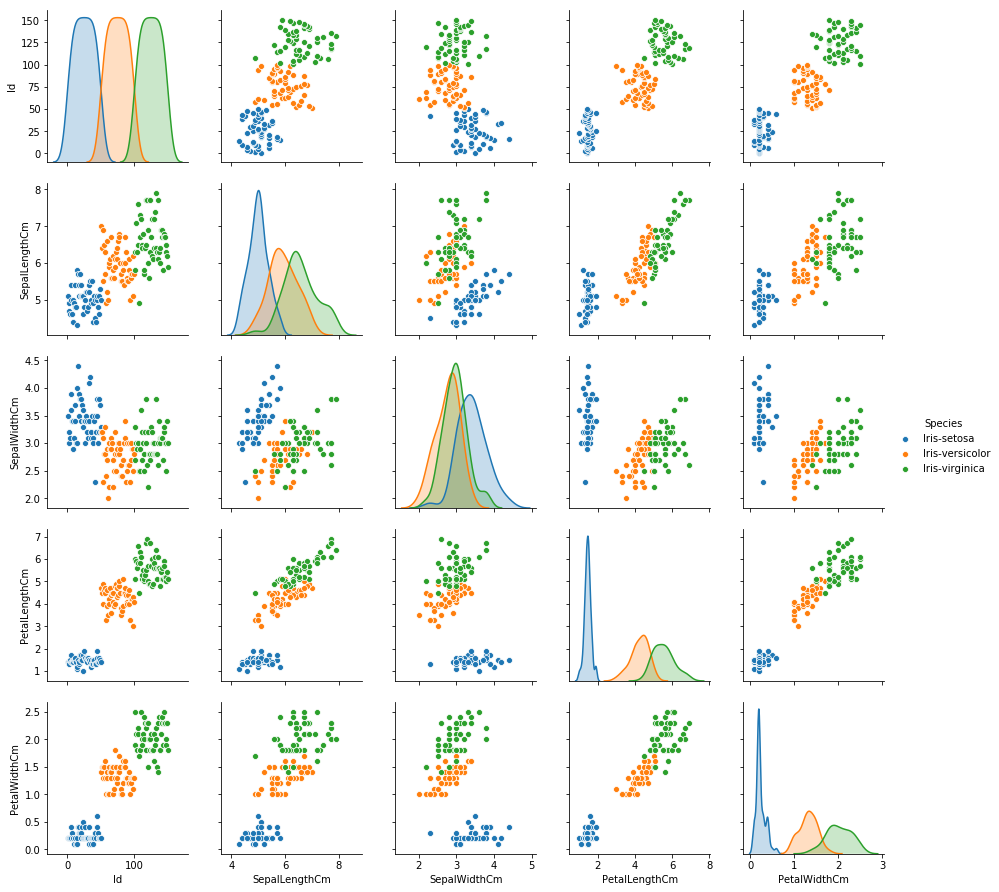

In [17]:
# Visualizing usig pair plot
sns.pairplot(df,hue='Species')
sns.despine()

In [18]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [19]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =10)

# Logistic Regression

In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
sc = lr_model.score(X_train,y_train)
print('percentage accuracy of Logistic Regression :',sc*100,'%')

percentage accuracy of Logistic Regression : 95.0 %


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
print(lr_model.predict(X_test))

[1 2 0 1 0 1 2 1 0 1 2 2 1 0 0 2 2 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [24]:
print(y_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


# SVM

In [25]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
sc = svm_model.score(X_train,y_train)
svm_model.predict(X_test)
print('percentage accuracy of SVM - ',sc*100,'%')


percentage accuracy of SVM -  98.33333333333333 %


# Naive Bayes

In [26]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
sc = nb_model.score(X_test,y_test)
nb_model.predict(X_test)
print('pecentage accuracy of Naive bayes - ',sc*100,'%')

pecentage accuracy of Naive bayes -  100.0 %


# Decision Tree

In [27]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(X_train,y_train)
sc = dt_model.score(X_test,y_test)
dt_model.predict(X_test)
print('percentage accuracy of Decision Tree - ',sc*100,'%')

percentage accuracy of Decision Tree -  95.83333333333334 %


# Random Forest

In [28]:
rfc_model = RandomForestClassifier(max_depth = 3)
rfc_model.fit(X_train,y_train)
sc = rfc_model.score(X_train,y_train)
rfc_model.predict(X_test)
print('Random Forest - ',sc*100,'%')

Random Forest -  97.5 %


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# K-NN

In [30]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
sc_knn = knn_model.score(X_train,y_train)
knn_model.predict(X_test)
print('percentage accuracy of KNN - ',sc_knn*100,"%")

percentage accuracy of KNN -  96.66666666666667 %


In [35]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [knn_model.score(X_train,y_train), svm_model.score(X_train,y_train),lr_model.score(X_train,y_train) , 
              rfc_model.score(X_train,y_train),nb_model.score(X_test,y_test) , dt_model.score(X_test,y_test)
             ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
1.000000,Naive Bayes
0.983333,KNN
0.975000,Random Forest
0.966667,Support Vector Machines
0.950000,Logistic Regression
0.933333,Decision Tree
